In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import os

In [2]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\01 Diabetes Prediction")
df = pd.read_csv("Diabetes-dataset_FS.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0


## Spliting dependent and independent variables

In [3]:
df_X = df.iloc[:,[0,1,2,3,4,5,6]]
df_X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0


In [4]:
df_Y = df['Outcome']
df_Y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

## Scaling continuous variables

In [5]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)

In [6]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))

In [7]:
df_X_scaled

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.865276,-0.005124,0.928458,-0.815354,0.217978,0.798645,1.556957
1,-1.205989,-0.542772,0.546002,-0.815354,-0.874679,-0.328392,-0.163949
2,2.015979,-0.721988,-1.302538,-0.815354,-1.389789,0.982401,-0.073375
3,-1.074480,-0.542772,0.163545,0.399244,-0.640538,-1.079749,-1.069690
4,0.503626,-2.872582,0.928458,1.355416,1.700869,0.165203,0.017199
...,...,...,...,...,...,...,...
763,-0.679954,0.353308,1.757114,1.510471,0.108712,-1.063415,2.734419
764,0.010468,-0.184340,0.418516,-0.815354,0.717478,-0.373310,-0.526245
765,-0.022409,-0.005124,0.163545,0.631826,-0.937117,-0.761239,-0.254523
766,0.141977,-1.080421,-1.302538,-0.815354,-0.328351,-0.336558,1.285235


## Checking distribution of variables

In [8]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(color="MEDIUMVIOLETRED")
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show

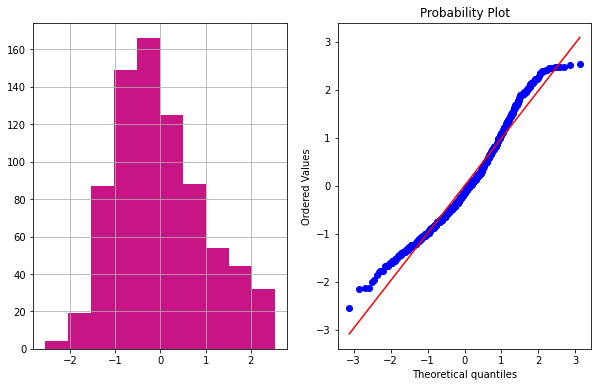

In [9]:
plot_data(df_X_scaled,'Glucose')

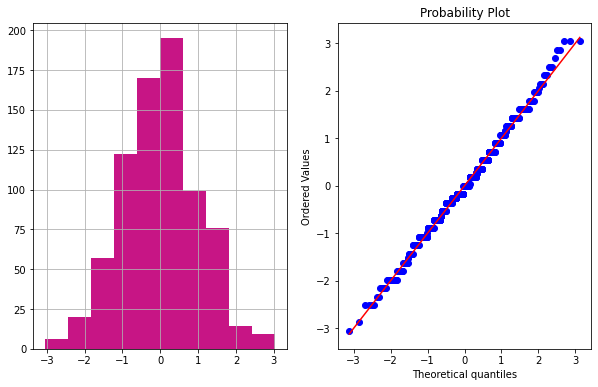

In [10]:
plot_data(df_X_scaled,'BloodPressure')

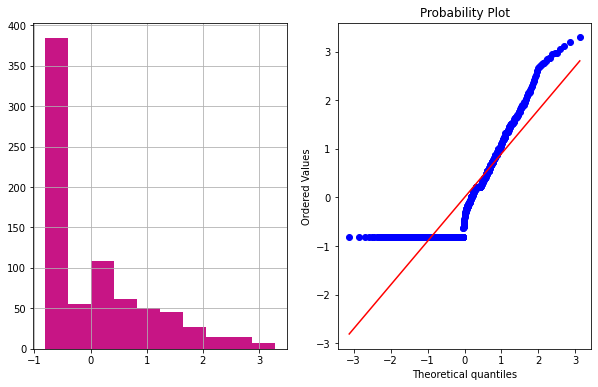

In [11]:
plot_data(df_X_scaled,'Insulin')

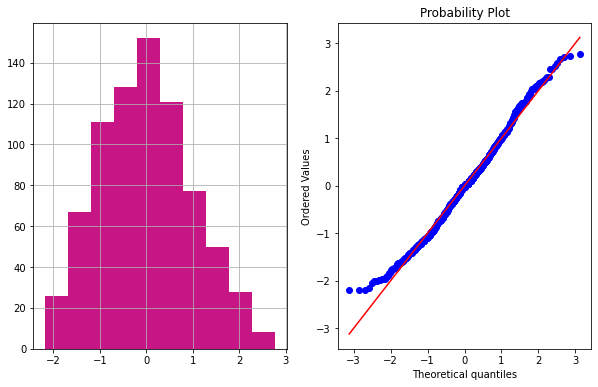

In [12]:
plot_data(df_X_scaled,'BMI')

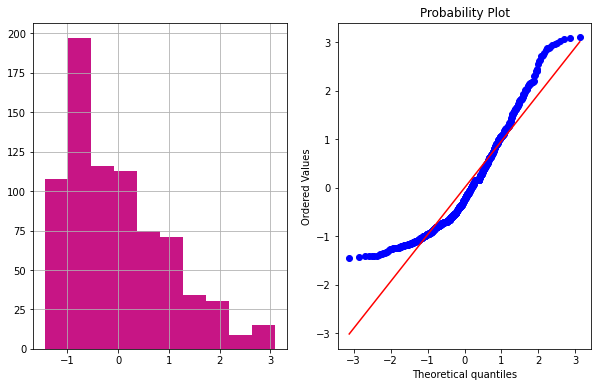

In [13]:
plot_data(df_X_scaled,'DiabetesPedigreeFunction')

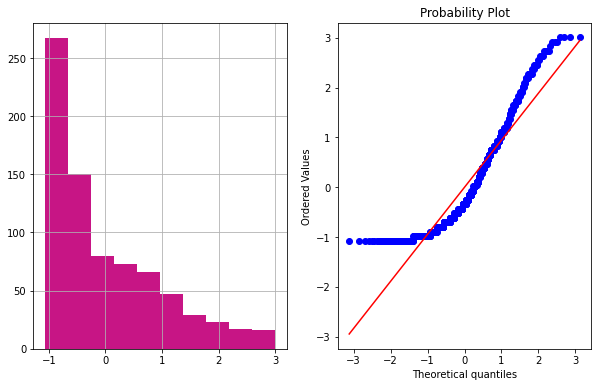

In [14]:
plot_data(df_X_scaled,'Age')

## Generating scaled dataset

In [15]:
df_scaled = pd.concat([df_X_scaled, df_Y], axis=1)
df_scaled

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.865276,-0.005124,0.928458,-0.815354,0.217978,0.798645,1.556957,1.0
1,-1.205989,-0.542772,0.546002,-0.815354,-0.874679,-0.328392,-0.163949,0.0
2,2.015979,-0.721988,-1.302538,-0.815354,-1.389789,0.982401,-0.073375,1.0
3,-1.074480,-0.542772,0.163545,0.399244,-0.640538,-1.079749,-1.069690,0.0
4,0.503626,-2.872582,0.928458,1.355416,1.700869,0.165203,0.017199,1.0
...,...,...,...,...,...,...,...,...
763,-0.679954,0.353308,1.757114,1.510471,0.108712,-1.063415,2.734419,0.0
764,0.010468,-0.184340,0.418516,-0.815354,0.717478,-0.373310,-0.526245,0.0
765,-0.022409,-0.005124,0.163545,0.631826,-0.937117,-0.761239,-0.254523,0.0
766,0.141977,-1.080421,-1.302538,-0.815354,-0.328351,-0.336558,1.285235,1.0


## Exproting transformed dataset

In [16]:
df_scaled.to_csv('Diabetes-dataset_FT.csv', encoding='utf-8', index=False)